# Preparation et analyse des données

## Chargement et exploration des données

### Chargement des données

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
uduma_records = pd.read_csv('../dataset/Uduma_sample_data.csv')
# print the first few rows
uduma_records.head()

,"point_name,commune,village,latitude,longitude,installation_date,meter_type,connection_type,status,reading_date,meter_index,revenue_fcfa,recorded_by,notes"
0,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."
1,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."
2,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."
3,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."
4,"Borne Fontaine Sikasso Centre,Sikasso,Sikasso,..."


Lors de du chargement des données on se rend compte que les données sont combinées dans une seule colonne. Il nous faudra séparer les données par colonne

In [3]:
# print column names
uduma_records.columns

Index(['point_name,commune,village,latitude,longitude,installation_date,meter_type,connection_type,status,reading_date,meter_index,revenue_fcfa,recorded_by,notes'], dtype='object')

In [4]:
# Split the data into columns
uduma_records = uduma_records.iloc[:, 0].str.split(',', expand=True).rename(columns={
    0: 'point_name',
    1: 'commune',
    2: 'village',
    3: 'latitude',
    4: 'longitude',
    5: 'installation_date',
    6: 'meter_type',
    7: 'connection_type',
    8: 'status',
    9: 'reading_date',
    10: 'meter_index',
    11: 'revenue_fcfa',
    12: 'recorded_by',
    13: 'notes'
})

In [5]:
uduma_records

,point_name,commune,village,latitude,longitude,installation_date,meter_type,connection_type,status,reading_date,meter_index,revenue_fcfa,recorded_by,notes
0,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-01-15,47850,9500,Amadou Traoré,
1,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-02-15,47869,9500,Amadou Traoré,
2,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-03-15,47889,10000,Amadou Traoré,
3,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-04-15,47908,9500,Amadou Traoré,
4,Borne Fontaine Sikasso Centre,Sikasso,Sikasso,11.3176,-5.6756,2022-03-15,Mechanical,Borne Fontaine,active,2024-05-15,47930,11000,Amadou Traoré,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Borne Fontaine Mandé,Mandé,Mandé Village,12.1,-7.2,2021-08-30,Mechanical,Borne Fontaine,active,2024-03-16,33218,10000,Adama Coulibaly,
101,Borne Fontaine Mandé,Mandé,Mandé Village,12.1,-7.2,2021-08-30,Mechanical,Borne Fontaine,active,2024-04-16,33236,9000,Adama Coulibaly,
102,Borne Fontaine Mandé,Mandé,Mandé Village,12.1,-7.2,2021-08-30,Mechanical,Borne Fontaine,active,2024-05-16,33256,10000,Adama Coulibaly,
103,Borne Fontaine Mandé,Mandé,Mandé Village,12.1,-7.2,2021-08-30,Mechanical,Borne Fontaine,active,2024-06-16,33274,9000,Adama Coulibaly,


In [6]:
# check the type of each column in the dataframe
uduma_records.dtypes

point_name           object
commune              object
village              object
latitude             object
longitude            object
installation_date    object
meter_type           object
connection_type      object
status               object
reading_date         object
meter_index          object
revenue_fcfa         object
recorded_by          object
notes                object
dtype: object

Toutes les colonnes du dataset sont de type `object`. Cela signifie qu'elles contiennent des données textuelles ou des catégories. Il peut être nécessaire de les convertir en types appropriés (par exemple, datetime pour les dates) avant de procéder à une analyse plus approfondie.

### Attribution des types appropriés

In [7]:

# point_name,commune,village,latitude,longitude,installation_date,meter_type,connection_type,status,reading_date,meter_index,revenue_fcfa,recorded_by,notes'

# On va créer une map pour chaque colonne et son type de donnée approprié
dtype_map = {
    'point_name': 'category',
    'commune': 'category',
    'village': 'category',
    'latitude': 'float64',
    'longitude': 'float64',
    'installation_date': 'datetime64[ns]',
    'meter_type': 'category',
    'connection_type': 'category',
    'status': 'category',
    'reading_date': 'datetime64[ns]',
    'meter_index': 'int64',
    'revenue_fcfa': 'float64',
    'recorded_by': 'category',
    'notes': 'category'
}

# On va appliquer ce map pour changer le type de chaque colonne
for column, dtype in dtype_map.items():
    uduma_records[column] = uduma_records[column].astype(dtype)
    
# check the type of each column in the dataframe
uduma_records.dtypes


point_name                 category
commune                    category
village                    category
latitude                    float64
longitude                   float64
installation_date    datetime64[ns]
meter_type                 category
connection_type            category
status                     category
reading_date         datetime64[ns]
meter_index                   int64
revenue_fcfa                float64
recorded_by                category
notes                      category
dtype: object

### Vérification de données manquantes et valeures abérantes

In [8]:
# Check for missing values
print("Valeurs manquantes:\n", uduma_records.isnull().sum())
print(uduma_records.info())
print(uduma_records.describe())

Valeurs manquantes:
 point_name           0
commune              0
village              0
latitude             0
longitude            0
installation_date    0
meter_type           0
connection_type      0
status               0
reading_date         0
meter_index          0
revenue_fcfa         0
recorded_by          0
notes                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   point_name         105 non-null    category      
 1   commune            105 non-null    category      
 2   village            105 non-null    category      
 3   latitude           105 non-null    float64       
 4   longitude          105 non-null    float64       
 5   installation_date  105 non-null    datetime64[ns]
 6   meter_type         105 non-null    category      
 7   connection_type    105 non-null    cate

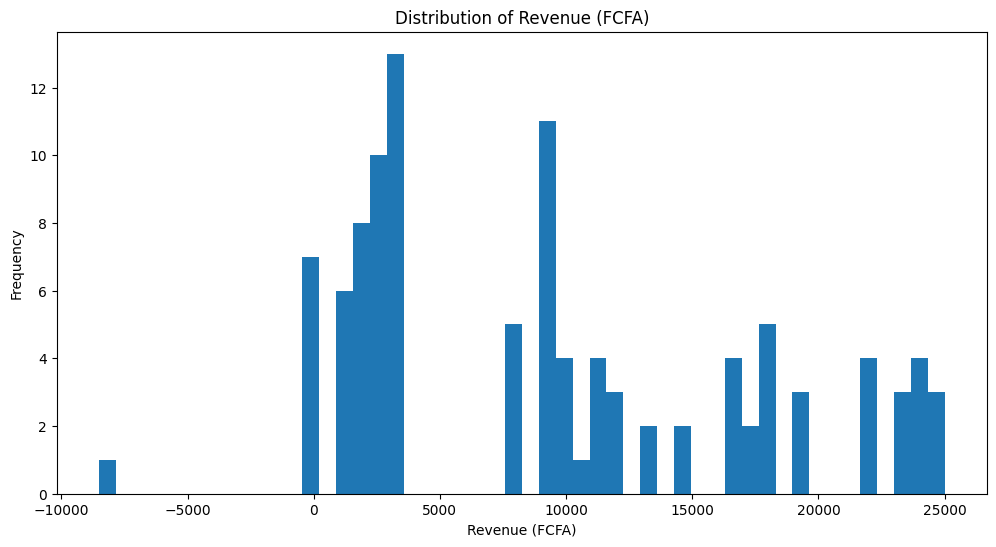

In [9]:
# Visualize the distribution of revenue

plt.figure(figsize=(12, 6))
uduma_records['revenue_fcfa'].hist(bins=50)
plt.title('Distribution of Revenue (FCFA)')
plt.xlabel('Revenue (FCFA)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

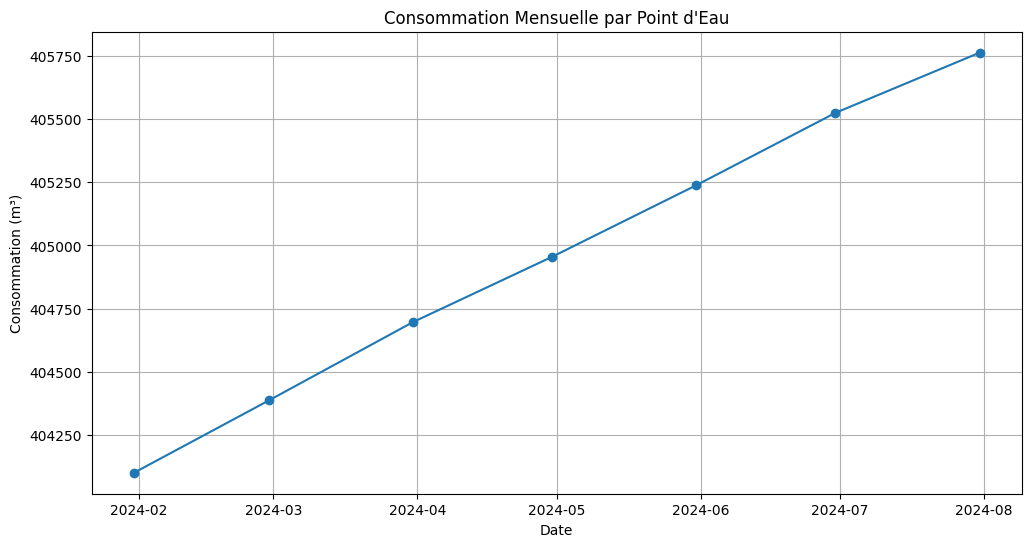

In [10]:
# Calculer la consommation mensuelle pour chaque point d’eau

uduma_records['reading_date'] = pd.to_datetime(uduma_records['reading_date'], errors='coerce')

# Définir 'reading_date' comme index pour le resampling
uduma_records_indexed = uduma_records.set_index('reading_date')

# Resample par mois et calculer la somme
monthly_consumption = uduma_records_indexed.resample('ME').sum(numeric_only=True)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_consumption.index, monthly_consumption['meter_index'], marker='o')
plt.title('Consommation Mensuelle par Point d\'Eau')
plt.xlabel('Date')
plt.ylabel('Consommation (m³)')
plt.grid()
plt.show()


In [11]:
# Detect anomalies in meter index regarding the revenue produced

# Anomalies can be detected by checking for negative revenue or meter index values
negative_revenue = uduma_records[uduma_records['revenue_fcfa'] < 0]
negative_meter_index = uduma_records[uduma_records['meter_index'] < 0]
anomalies = pd.concat([negative_revenue, negative_meter_index]).drop_duplicates()
anomalies


,point_name,commune,village,latitude,longitude,installation_date,meter_type,connection_type,status,reading_date,meter_index,revenue_fcfa,recorded_by,notes
97,Borne Fontaine Kita,Kita,Kita Centre,13.0333,-9.4833,2022-05-25,Digital,Borne Fontaine,active,2024-07-06,24750,-8500.0,Ousmane Keita,Compteur défaillant - relevé impossible
